# TRAFFIC SIGN RECOGNITION PROJECT

---



### 1) Downloading the dataset
Intro

1.   Multi-class classification problem
2.   More than 40 classes
3.   More than 50,000 images in total
4.   Large, lifelike database

In [19]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gtsrb-german-traffic-sign.zip
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# 2) Understanding the data and preprocessing 

CLASS LABELS SCREENSHOT ADDED FOR REFERENCE BELOW

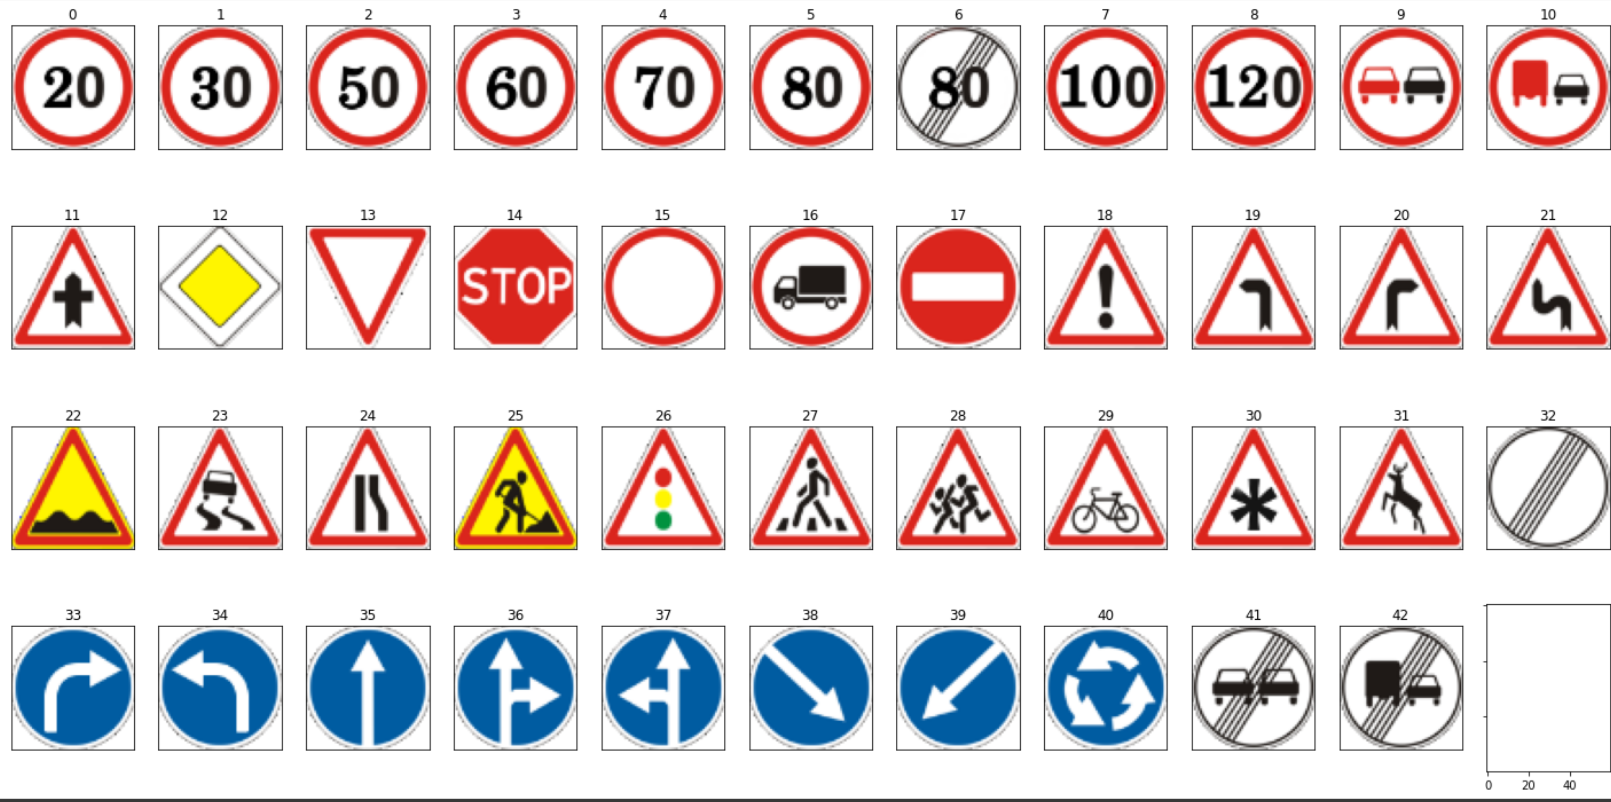

In [11]:
## Importing required libraries for pre-processing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns

In [12]:
imgs_path = "./Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)

In [13]:
# checking exactly how the data is going to be appended
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(39209, 30, 30, 3)


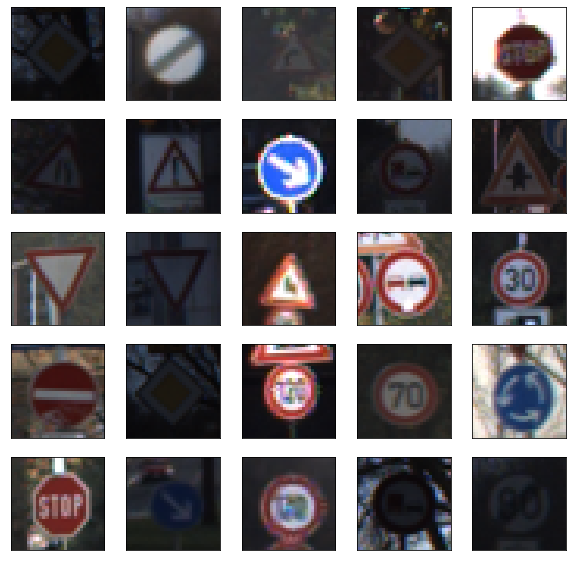

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(39209)], cmap=plt.cm.binary)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


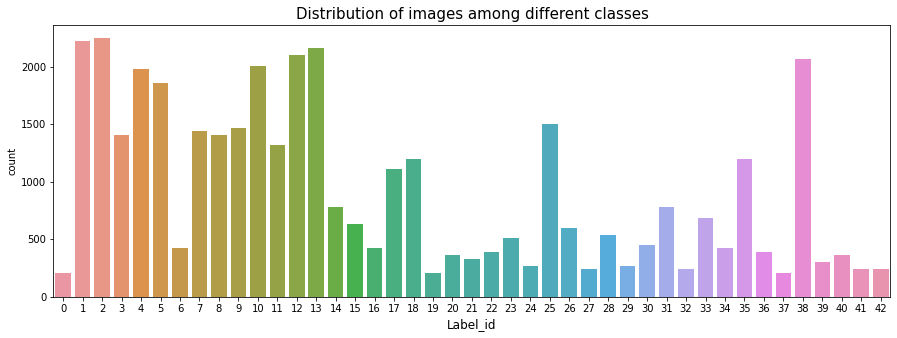

In [20]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(labels)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

## 3) SPLITTING THE DATA

In [38]:
# import train_test_split
from sklearn.model_selection import train_test_split

# shape of dataset
data = data.reshape(data.shape[0],2700)
print(data.shape)
 
X_train,X_test,y_train,y_test  =  train_test_split(data,labels,test_size=0.2,random_state = 0)
print(X_train.shape,X_test.shape)

(39209, 2700)
(31367, 2700) (7842, 2700)


## 4) ONE HOT ENCODING

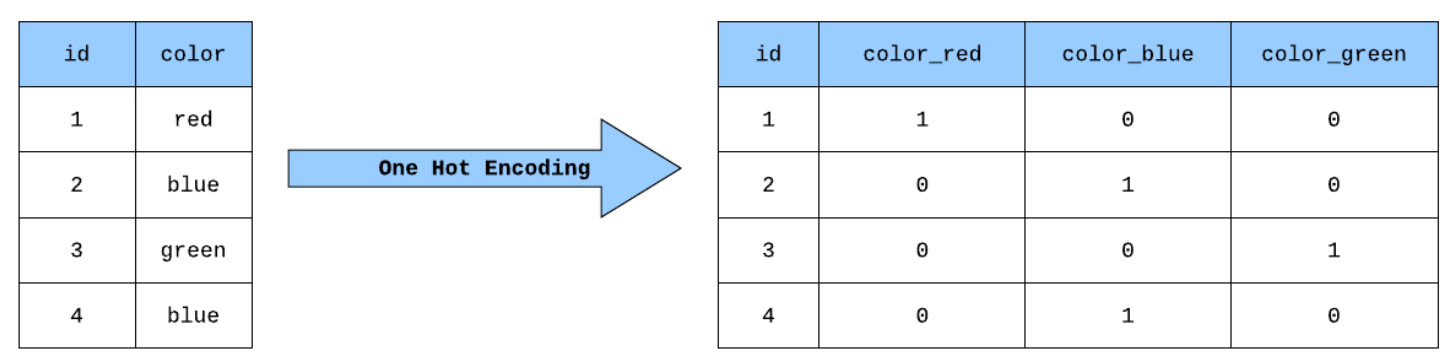


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
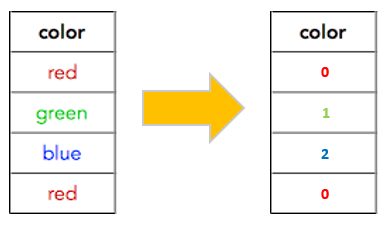
---



## POLL TIME!!!

In [39]:
# importing to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

# 5) BUILDING ANN MODEL
## Architecture will be like
#### 1) 3 layers with 256 nodes each
#### 2) 3 layers with 128 nodes each
#### 3) 4 layers with 64 nodes each
#### 4) Output_layer with 43 nodes

In [40]:
from keras.layers import Dense
from keras.models import Sequential

# initialize model
ann_model = Sequential()
# block 1
ann_model.add(Dense(256,activation = "relu"))
ann_model.add(Dense(256,activation = "relu"))
ann_model.add(Dense(256,activation = "relu"))
# block 2
ann_model.add(Dense(128,activation = "relu"))
ann_model.add(Dense(128,activation = "relu"))
ann_model.add(Dense(128,activation = "relu"))
# block 3
ann_model.add(Dense(64,activation = "relu"))
ann_model.add(Dense(64,activation = "relu"))
ann_model.add(Dense(64,activation = "relu"))
ann_model.add(Dense(64,activation = "relu"))
# output layer
ann_model.add(Dense(43,activation = "softmax"))

# 6) COMPILING THE MODEL

In [41]:
ann_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics= ["accuracy"])

In [42]:
epochs =15
history_ann = ann_model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/15
981/981 [==============================] - 12s 11ms/step - loss: 3.0130 - accuracy: 0.1765 - val_loss: 2.1375 - val_accuracy: 0.3532
Epoch 2/15
981/981 [==============================] - 10s 10ms/step - loss: 1.7780 - accuracy: 0.4437 - val_loss: 1.8633 - val_accuracy: 0.4383
Epoch 3/15
981/981 [==============================] - 11s 11ms/step - loss: 1.3411 - accuracy: 0.5755 - val_loss: 1.4828 - val_accuracy: 0.5505
Epoch 4/15
981/981 [==============================] - 10s 10ms/step - loss: 1.1160 - accuracy: 0.6548 - val_loss: 0.9090 - val_accuracy: 0.7100
Epoch 5/15
981/981 [==============================] - 10s 10ms/step - loss: 0.9025 - accuracy: 0.7227 - val_loss: 0.7812 - val_accuracy: 0.7706
Epoch 6/15
981/981 [==============================] - 11s 11ms/step - loss: 0.8488 - accuracy: 0.7409 - val_loss: 0.9315 - val_accuracy: 0.7071
Epoch 7/15
981/981 [==============================] - 10s 10ms/step - loss: 0.7525 - accuracy: 0.7785 - val_loss: 0.8441 - val_accuracy:

# 7) PLOTTING GRAPHS SO AS TO COMAPRE THE ACCURACY OF TRAINING AND VALIDATING DATA

Text(0.5, 1.0, 'ACCURACY USING ANN')

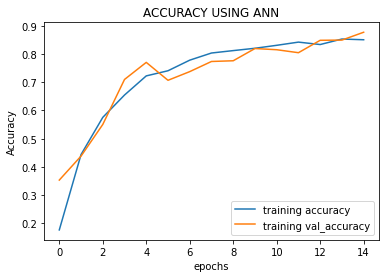

In [43]:
plt.figure(0)
plt.plot(history_ann.history["accuracy"],label="training accuracy")
plt.plot(history_ann.history["val_accuracy"],label="training val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY USING ANN")

Text(0.5, 1.0, 'loss USING ANN')

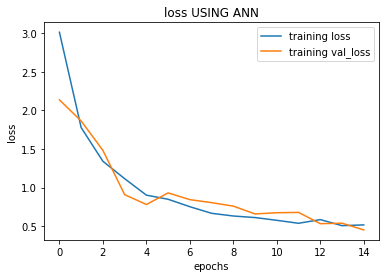

In [44]:
plt.figure(0)
plt.plot(history_ann.history["loss"],label="training loss")
plt.plot(history_ann.history["val_loss"],label="training val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss USING ANN")

# 8) Making predictions on unseen data

In [45]:
#testing accuracy on test dataset

y_test_data = pd.read_csv("Test.csv")

labels= y_test_data["ClassId"].values
imgs = y_test_data["Path"].values

data_set = []

for img in imgs:
  image = Image.open(img)
  image = image.resize((30,30))
  data_set.append(np.array(image))

In [46]:
X_data_test = np.array(data_set)
X_data_test = X_data_test.reshape(X_data_test.shape[0],2700)

In [48]:
prediction = ann_model.predict(X_data_test)
classes_x = np.argmax(prediction,axis=1)

In [50]:
from sklearn.metrics import accuracy_score
# Here we will be getting the accuracy on testing data set
print(accuracy_score(labels,classes_x))

0.7931116389548694


# 9) Let us randomly select data from test_data_set and see about the predictions

23


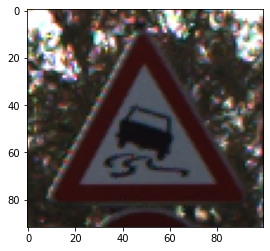

In [54]:
n = np.random.randint(0,1000)
im = Image.open(imgs[n])
plt.imshow(im)
print(classes_x[n])

Let us compare

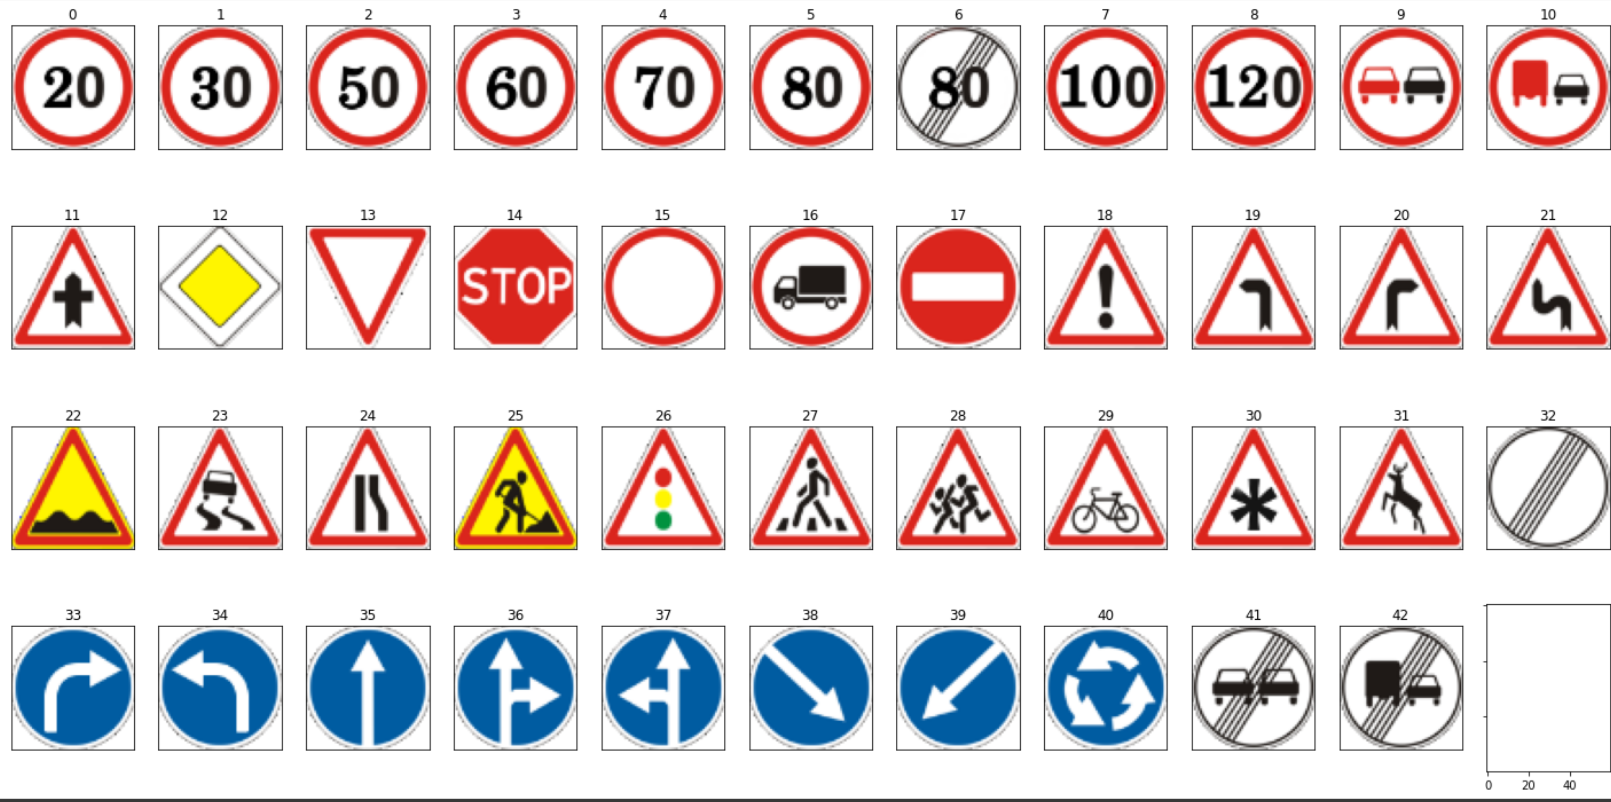